In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cubic_zirconia.csv")

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [4]:
df = df.dropna()

In [5]:
x = df.iloc[:, 1:-1].values
x

array([[0.3, 'Ideal', 'E', ..., 4.27, 4.29, 2.66],
       [0.33, 'Premium', 'G', ..., 4.42, 4.46, 2.7],
       [0.9, 'Very Good', 'E', ..., 6.04, 6.12, 3.78],
       ...,
       [0.51, 'Premium', 'E', ..., 5.12, 5.15, 3.17],
       [0.27, 'Very Good', 'F', ..., 4.19, 4.2, 2.6],
       [1.25, 'Premium', 'J', ..., 6.9, 6.88, 4.27]], dtype=object)

In [6]:
y = df.iloc[:, -1].values
y

array([ 499,  984, 6289, ..., 1656,  682, 5166], dtype=int64)

## Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [9]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1,2,3])], remainder="passthrough")

In [10]:
x = np.array(ct.fit_transform(x))

In [11]:
x

array([[0.0, 0.0, 1.0, ..., 4.27, 4.29, 2.66],
       [0.0, 0.0, 0.0, ..., 4.42, 4.46, 2.7],
       [0.0, 0.0, 0.0, ..., 6.04, 6.12, 3.78],
       ...,
       [0.0, 0.0, 0.0, ..., 5.12, 5.15, 3.17],
       [0.0, 0.0, 0.0, ..., 4.19, 4.2, 2.6],
       [0.0, 0.0, 0.0, ..., 6.9, 6.88, 4.27]], dtype=object)

## Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [14]:
x_train

array([[0.0, 0.0, 0.0, ..., 5.32, 5.38, 3.34],
       [0.0, 0.0, 1.0, ..., 4.49, 4.47, 2.77],
       [0.0, 0.0, 0.0, ..., 6.39, 6.42, 3.98],
       ...,
       [0.0, 0.0, 0.0, ..., 6.21, 6.25, 3.81],
       [0.0, 0.0, 1.0, ..., 5.54, 5.57, 3.37],
       [0.0, 0.0, 1.0, ..., 6.25, 6.2, 3.83]], dtype=object)

In [15]:
scores = {}

In [16]:
y_train

array([1902,  914, 3899, ..., 3958, 2156, 4284], dtype=int64)

## Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
decision_tree = DecisionTreeRegressor()

In [19]:
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [20]:
y_pred = decision_tree.predict(x_test)

In [21]:
from sklearn.metrics import r2_score

In [22]:
scores.update({"decision tree": r2_score(y_true=y_test, y_pred=y_pred)})

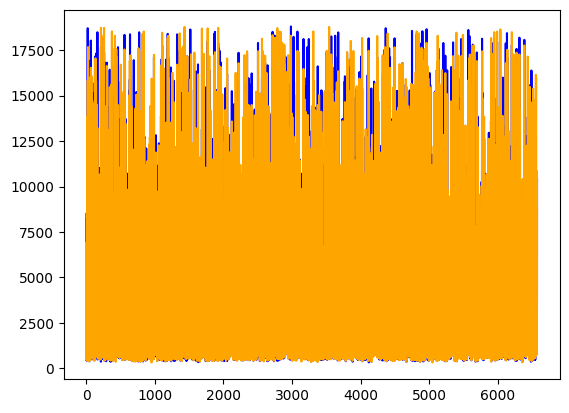

In [23]:
plt.plot(range(1, len(y_test) + 1), y_test, color="blue")
plt.plot(range(1,len(y_test) + 1), y_pred, color="orange")

## Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
random_forest = RandomForestRegressor(n_estimators=100)

In [26]:
x_train = pd.DataFrame(x_train).dropna().values
x_test = pd.DataFrame(x_test).dropna().values

In [27]:
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [28]:
y_pred_2 = random_forest.predict(x_test)

In [29]:
scores.update({"random forest": r2_score(y_true=y_test, y_pred=y_pred_2)})

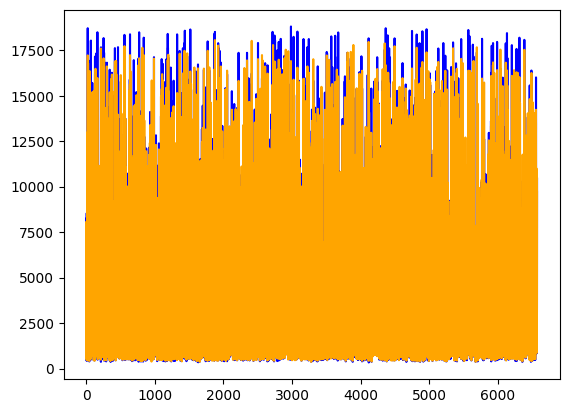

In [30]:
plt.plot(range(1, len(y_test) + 1), y_test, color="blue")
plt.plot(range(1,len(y_test) + 1), y_pred_2, color="orange")

## Support Vector Regression

In [31]:
from sklearn.svm import SVR

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scale_x = StandardScaler()
scale_y = StandardScaler()

In [34]:
scaled_x = scale_x.fit_transform(x)
scaled_y = scale_y.fit_transform(y.reshape(-1,1))

In [35]:
scaled_x

array([[-0.17225315, -0.31577736,  1.22106177, ..., -1.29416933,
        -1.23720933, -1.25355212],
       [-0.17225315, -0.31577736, -0.81895939, ..., -1.16113086,
        -1.09145025, -1.19635383],
       [-0.17225315, -0.31577736, -0.81895939, ...,  0.27568453,
         0.33184434,  0.34799999],
       ...,
       [-0.17225315, -0.31577736, -0.81895939, ..., -0.54028471,
        -0.49983985, -0.52427393],
       [-0.17225315, -0.31577736, -0.81895939, ..., -1.36512317,
        -1.31437591, -1.33934956],
       [-0.17225315, -0.31577736, -0.81895939, ...,  1.03843838,
         0.98347318,  1.04867904]])

In [36]:
scaled_y

array([[-0.85501673],
       [-0.73443334],
       [ 0.5845252 ],
       ...,
       [-0.56735697],
       [-0.80951826],
       [ 0.3053187 ]])

In [37]:
svr = SVR(kernel="rbf")

In [38]:
x_train_svr, x_test_svr, y_train_svr, y_test_svr = train_test_split(scaled_x, scaled_y)

In [39]:
print(len(x_train_svr))
print(len(x_test_svr))
print(len(y_train_svr))
print(len(y_test_svr))

19702
6568
19702
6568


In [40]:
svr.fit(x_train_svr, y_train_svr)

C:\Users\Sunandan\DataspellProjects\tryout\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [41]:
y_pred_3 = scale_y.inverse_transform(
    svr.predict(
        scale_x.fit_transform(
            x_test_svr)).reshape(-1,1))

In [42]:
scores.update({"SVR": r2_score(y_pred=y_pred_3, y_true=scale_y.inverse_transform(y_test_svr))})

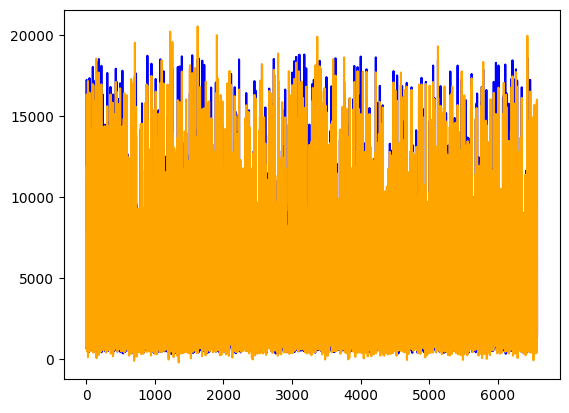

In [43]:
plt.plot(range(1, len(y_test) + 1), scale_y.inverse_transform(y_test_svr), color="blue")
plt.plot(range(1, len(y_test) + 1), y_pred_3, color="orange")

## Polynomial Regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly = PolynomialFeatures(degree=2)

In [48]:
x_poly = poly.fit_transform(x)

In [49]:
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
poly_regressor = LinearRegression()

In [53]:
poly_regressor.fit(x_train_poly, y_train_poly)

LinearRegression()

In [54]:
y_pred_4 = poly_regressor.predict(x_test_poly)

In [55]:
scores.update({"Polynomial regression": r2_score(y_true=y_test_poly, y_pred=y_pred_4)})

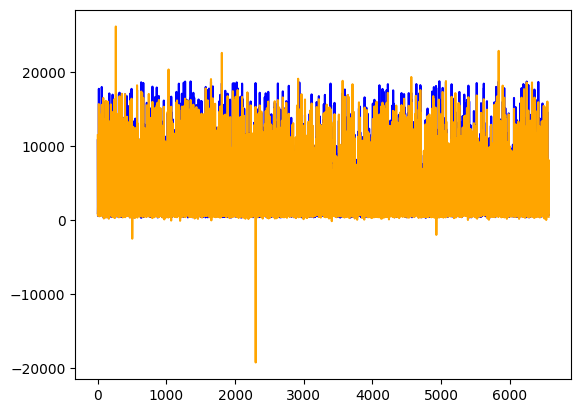

In [56]:
plt.plot(range(1, len(y_test) + 1), y_test_poly, color="blue")
plt.plot(range(1, len(y_test) + 1), y_pred_4, color="orange")

## Multiple Linear Regression

In [57]:
multiple_regression = LinearRegression()

In [58]:
multiple_regression.fit(x_train, y_train)

LinearRegression()

In [59]:
y_pred_5 = multiple_regression.predict(x_test)

In [60]:
scores.update({"multiple regression": r2_score(y_pred=y_pred_5, y_true=y_test)})

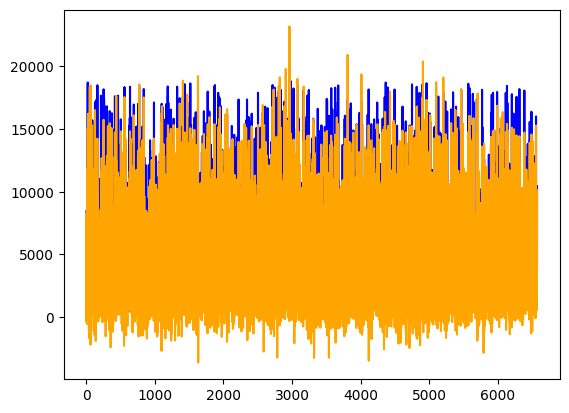

In [61]:
plt.plot(range(1, len(y_test) + 1), y_test, color="blue")
plt.plot(range(1, len(y_test) + 1), y_pred_5, color="orange")

## Verdict

In [62]:
scores

{'decision tree': 0.9622343285080104,
 'random forest': 0.9813278257035941,
 'SVR': 0.9736076875834593,
 'Polynomial regression': 0.9643329836568129,
 'multiple regression': 0.922047454606116}

In [63]:
max = 0
name = ""
for key in scores:
    if(scores[key] > max):
        max = scores[key]
        name = key
print(f"name : {name}, score : {max}")

name : random forest, score : 0.9813278257035941
